In [1]:
#importing libraries
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#reading files
symptoms=pd.read_csv("D:\Detecting parkinsons disease\cleaned-data.csv")
symptoms.head()

,Unnamed: 0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00576,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00576,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00576,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,phon_R01_S01_5,116.014,141.781,110.655,0.01101,0.000037,0.00593,0.00576,0.01778,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#independent variable
X=symptoms.drop(['name','status'],axis=1)
#dependent variable
y=symptoms['status']

In [4]:
X.columns


Index(['Unnamed: 0', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
#splitting the data into train and test data sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)



In [6]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))

Learning rate:  0.05
Accuracy score (training): 0.860
Learning rate:  0.075
Accuracy score (training): 0.897
Learning rate:  0.1
Accuracy score (training): 0.919
Learning rate:  0.25
Accuracy score (training): 1.000
Learning rate:  0.5
Accuracy score (training): 1.000
Learning rate:  0.75
Accuracy score (training): 1.000
Learning rate:  1
Accuracy score (training): 1.000


In [7]:
model= GradientBoostingClassifier(learning_rate=0.01,random_state=42)
model.fit(X_train, y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.9491525423728814

In [8]:
#predicting the results
y_pred=model.predict(X_test)
pd.DataFrame({'actual status':y_test,"predicted status:":y_pred})

,actual status,predicted status:
138,1,1
16,1,1
155,1,1
96,1,1
68,1,1
153,1,1
55,1,1
15,1,1
112,1,1
111,1,1


In [9]:
#Model Evaluation
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
conf_mat= confusion_matrix(y_test, y_pred) 
conf_mat

array([[13,  2],
       [ 1, 43]], dtype=int64)

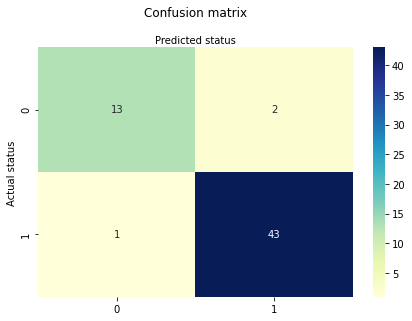

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#Heatmap for confusionmatrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual status')
plt.xlabel('Predicted status')
plt.savefig("HeatMap")

In [11]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy_score is :",accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy_score is : 94.91525423728814
Precision: 95.55555555555556
Recall: 97.72727272727273


In [12]:
#LogLoss
from sklearn.metrics import log_loss
logLoss=log_loss(y_test,y_pred)
print("Logloss: %.2f" % (logLoss))

Logloss: 1.76


AUC - Test Set: 99.24%


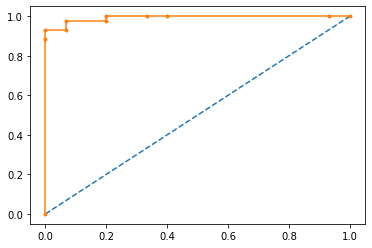

In [13]:
#ROC
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [14]:
#F score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.966292


In [15]:
#Learning curve
from sklearn.model_selection import learning_curve

In [16]:
sizes , training_scores, testing_scores = learning_curve(model, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [17]:
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
mean_testing= np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

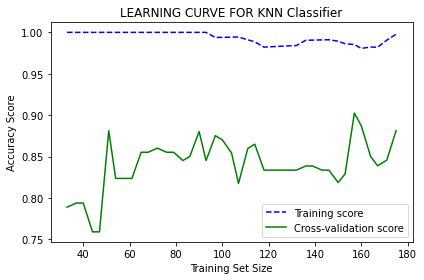

In [18]:
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()